In [1]:
import numpy as np
import numpy.linalg as nl
import sympy as sy
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def A(n,m):
    row=np.array([[(-1)**j for j in range(m+1)]])
    A=row
    for i in range(1,n+1):
        xi=-1+2*i/n
        row=np.array([[xi**j for j in range(m+1)]])
        A=np.vstack((A,row))
    return A
def x_i(n):
    return np.linspace(-1, 1, n+1)
def y_i(n):
    A=np.reshape(np.array(1/(1+25*(x_i(n))**2)),(n+1,1))
    return A 
def y(x):
    return 1/(1+25*x**2) 

In [7]:
#I would like to cheat a bit and use the least square instead
from numpy.linalg import lstsq
SVD_sol,residuals,rank,s=lstsq(A(10,10),y_i(10))
print(SVD_sol,rank)

[[ 1.00000000e+00]
 [ 3.97903932e-13]
 [-1.68552036e+01]
 [-5.09922845e-12]
 [ 1.23359729e+02]
 [ 2.22024307e-11]
 [-3.81433824e+02]
 [-3.47261172e-11]
 [ 4.94909502e+02]
 [ 1.71724405e-11]
 [-2.20941742e+02]] 11


/var/folders/d2/3mf1ph3s2q9bny72q5vytdcm0000gn/T/ipykernel_9302/2789596852.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  SVD_sol,residuals,rank,s=lstsq(A(10,10),y_i(10))


In [4]:
def least_squre(A,n,m):
    U,D,VT=nl.svd(A)
    diag_D=np.diag(D)
    if n==m:
        return np.transpose(VT)@nl.inv(diag_D)@np.transpose(U)@y_i(n)
    elif n>m:
        zero_matrix=np.zeros((m+1,n-m))
        sigma=np.hstack((np.linalg.inv(diag_D),zero_matrix))
        return np.transpose(VT)@sigma@np.transpose(U)@y_i(n)
least_squre(A(10,10),10,10)
least_squre(A(80,20),80,20)

array([[ 1.00000000e+00],
       [ 3.48610030e-13],
       [-1.68552036e+01],
       [-5.08748599e-12],
       [ 1.23359729e+02],
       [ 2.21973551e-11],
       [-3.81433824e+02],
       [-3.47313289e-11],
       [ 4.94909502e+02],
       [ 1.71738179e-11],
       [-2.20941742e+02]])

array([[ 9.86177440e-01],
       [-1.82879094e-11],
       [-1.99405121e+01],
       [ 1.00971231e-10],
       [ 2.59603058e+02],
       [ 1.15808518e-09],
       [-2.03527067e+03],
       [-2.16724629e-08],
       [ 9.81576298e+03],
       [ 1.24588723e-07],
       [-3.00269756e+04],
       [-3.63344952e-07],
       [ 5.92445359e+04],
       [ 5.96817699e-07],
       [-7.50393118e+04],
       [-5.56938176e-07],
       [ 5.88646706e+04],
       [ 2.74591912e-07],
       [-2.60104106e+04],
       [-5.53035306e-08],
       [ 4.94638969e+03]])

<Figure size 720x432 with 0 Axes>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'Polynomial Approximations of y(x) (Least square problem)')

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

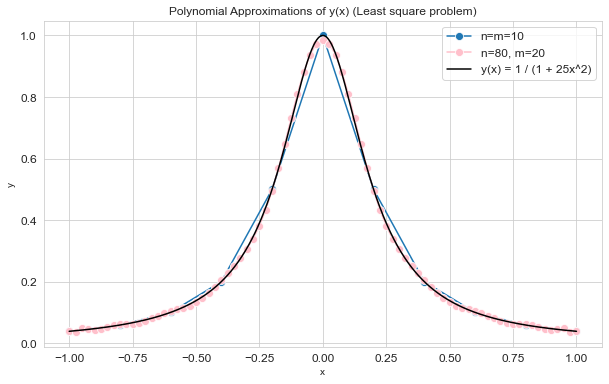

In [5]:
P_x_j=np.polyval(least_squre(A(10,10),10,10)[::-1],x_i(10))
P_x_j_1=np.polyval(least_squre(A(80,20),80,20)[::-1],x_i(80))
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x_i(10), P_x_j, marker='o', markersize=8, label="n=m=10")
sns.lineplot(x_i(80), P_x_j_1, marker='o', markersize=8, color='pink', label="n=80, m=20")
sns.lineplot(x_i(1000), y(x_i(1000)), color="black", label="y(x) = 1 / (1 + 25x^2)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Approximations of y(x) (Least square problem)")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('Least square',dpi=300)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'n=m=10')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'n=80, m=20')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'Polynomial Approximations of y(x)')

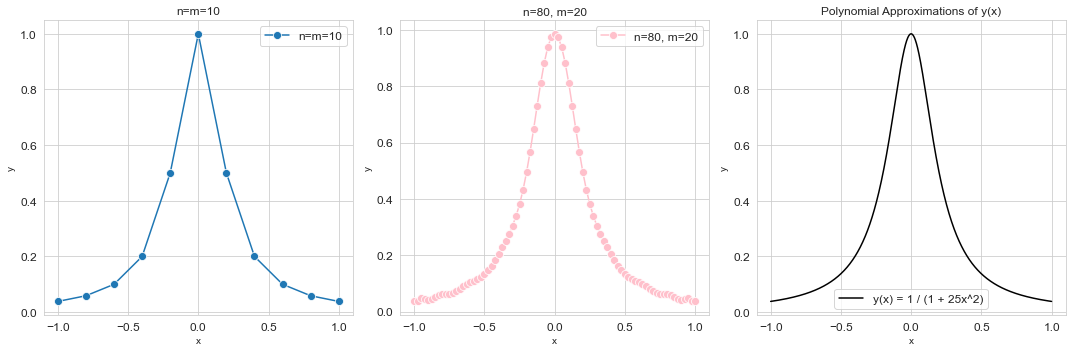

In [6]:
# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first subplot
sns.lineplot(x_i(10), P_x_j, marker='o', markersize=8, label="n=m=10", ax=axs[0])
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_title("n=m=10")
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend(fontsize=12)

# Plot the second subplot
sns.lineplot(x_i(80), P_x_j_1, marker='o', markersize=8, color='pink', label="n=80, m=20", ax=axs[1])
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_title("n=80, m=20")
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].legend(fontsize=12)

# Plot the third subplot
sns.lineplot(x_i(1000), y(x_i(1000)),color="black", label="y(x) = 1 / (1 + 25x^2)", ax=axs[2])
axs[2].set_xlabel("x")
axs[2].set_ylabel("y")
axs[2].set_title("Polynomial Approximations of y(x)")
axs[2].tick_params(axis='both', which='major', labelsize=12)
axs[2].legend(fontsize=12)

# Save and show the plot
plt.tight_layout()
plt.savefig('Least square subplots', dpi=300)
plt.show()